This notebook aims to predict house prices. Implements simple Regression on the dataset : https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads 
### Data Pre-Processing
In the next couple of of Cells, We load the datafile, strip unused features, and do some EDA to take a look at the type of data we're dealing with to try and find the ML model we could use to learn this kind of data. I  have included comments in the code cells to help the reader understand what's going on.

In [1]:
import pandas as pd
#reading main data file. when resources constrained, we could use the chunksize option of read_csv
main_df = pd.read_csv("input_large.csv",names=["id", "price", "date", "postcode",'type','new','duration','add1',
                                         'add2','add3','add4','add5','add6','add7','ppd cat','rec',])
main_df

,id,price,date,postcode,type,new,duration,add1,add2,add3,add4,add5,add6,add7,ppd cat,rec
0,{2A289E9F-6BB5-CDC8-E050-A8C063054829},36995,1995-03-24 00:00,SE19 3NF,F,N,L,CROWN POINT,14,BEULAH HILL,NaN,LONDON,CROYDON,GREATER LONDON,A,A
1,{2A289E9F-6BBA-CDC8-E050-A8C063054829},25000,1995-03-31 00:00,E16 1LG,F,N,L,9,NaN,POLLARD CLOSE,NaN,LONDON,NEWHAM,GREATER LONDON,A,A
2,{2A289E9F-6BC5-CDC8-E050-A8C063054829},25500,1995-05-17 00:00,EN3 6EA,F,N,L,33,NaN,BRIDLE CLOSE,NaN,ENFIELD,ENFIELD,GREATER LONDON,A,A
3,{2A289E9F-7DE9-CDC8-E050-A8C063054829},42000,1995-04-21 00:00,N13 4RS,T,N,L,87,NaN,RUSSELL ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
4,{2A289E9F-7DF0-CDC8-E050-A8C063054829},43000,1995-06-30 00:00,RM10 7NU,T,N,F,45,NaN,BOSWORTH ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27265980,{DE2D0CE0-96B1-51EE-E053-6C04A8C00671},575000,2022-03-23 00:00,GU3 2AS,S,N,F,FAIRVIEW COTTAGE,NaN,GUILDFORD ROAD,NORMANDY,GUILDFORD,GUILDFORD,SURREY,B,A
27265981,{DE2D0CE0-96B2-51EE-E053-6C04A8C00671},1082000,2022-03-17 00:00,SW19 8AB,T,N,F,145,NaN,ARTHUR ROAD,NaN,LONDON,MERTON,GREATER LONDON,B,A
27265982,{DE2D0CE0-96B6-51EE-E053-6C04A8C00671},2165000,2022-02-02 00:00,GU1 4DA,O,N,F,"CENTREPOINT HOUSE, 2",NaN,DENMARK ROAD,NaN,GUILDFORD,GUILDFORD,SURREY,B,A
27265983,{DE2D0CE0-96B9-51EE-E053-6C04A8C00671},360000,2022-01-20 00:00,NaN,O,N,F,GARAGE 8,NaN,ADELAIDE ROAD,NaN,ASHFORD,SPELTHORNE,SURREY,B,A


In [2]:
df_mod = main_df.drop(main_df.columns[[0, 3,5,7,8,9,10,11,12,14,15 ]], axis=1)
del main_df
df_mod
#Dropping unnecessary features

,price,date,type,duration,add7
0,36995,1995-03-24 00:00,F,L,GREATER LONDON
1,25000,1995-03-31 00:00,F,L,GREATER LONDON
2,25500,1995-05-17 00:00,F,L,GREATER LONDON
3,42000,1995-04-21 00:00,T,L,GREATER LONDON
4,43000,1995-06-30 00:00,T,F,GREATER LONDON
...,...,...,...,...,...
27265980,575000,2022-03-23 00:00,S,F,SURREY
27265981,1082000,2022-03-17 00:00,T,F,GREATER LONDON
27265982,2165000,2022-02-02 00:00,O,F,SURREY
27265983,360000,2022-01-20 00:00,O,F,SURREY


In [3]:
#Checking data, looking for extra values and/or any exceptions
print(df_mod.duration.unique(),df_mod.type.unique(),df_mod.add7.unique())

['L' 'F' 'U'] ['F' 'T' 'S' 'D' 'O'] ['GREATER LONDON' 'LANCASHIRE' 'WEST YORKSHIRE' 'KENT' 'NORTHAMPTONSHIRE'
 'GLOUCESTERSHIRE' 'MERSEYSIDE' 'MILTON KEYNES' 'TYNE AND WEAR' 'ESSEX'
 'WEST MIDLANDS' 'SOUTH YORKSHIRE' 'CAMBRIDGESHIRE' 'CHESHIRE' 'SWANSEA'
 'NORFOLK' 'STAFFORDSHIRE' 'BLACKPOOL' 'NORTHUMBERLAND' 'WORCESTERSHIRE'
 'LINCOLNSHIRE' 'AVON' 'OXFORDSHIRE' 'SURREY' 'LUTON' 'GREATER MANCHESTER'
 'EAST SUSSEX' 'LEICESTERSHIRE' 'BUCKINGHAMSHIRE' 'DERBYSHIRE'
 'HEREFORD AND WORCESTER' 'NOTTINGHAMSHIRE' 'SOMERSET' 'HUMBERSIDE'
 'BOURNEMOUTH' 'HAMPSHIRE' 'WEST SUSSEX' 'GWENT' 'WOKINGHAM' 'NEWPORT'
 'STOKE-ON-TRENT' 'SUFFOLK' 'SOUTHEND-ON-SEA' 'WINDSOR AND MAIDENHEAD'
 'STOCKTON-ON-TEES' 'NORTH YORKSHIRE' 'WARWICKSHIRE' 'SHROPSHIRE'
 'WREXHAM' 'HERTFORDSHIRE' 'PORTSMOUTH' 'DEVON' 'GWYNEDD' 'LEICESTER'
 'CLWYD' 'ISLE OF WIGHT' 'THURROCK' 'CUMBRIA' 'READING' 'RUTLAND'
 'SOUTHAMPTON' 'DORSET' 'SOUTH GLAMORGAN' 'CLEVELAND' 'DARLINGTON'
 'WARRINGTON' 'THAMESDOWN' 'HARTLEPOOL' 'BRACKNELL FORE

In [4]:
 df_mod.loc[df_mod['duration'] == 'U' ]
# I do not have an idea what U denotes in tenure terms

,price,date,type,duration,add7
7025,42016,1995-01-30 00:00,F,U,GREATER LONDON
47557,63500,1995-04-28 00:00,F,U,BOURNEMOUTH
232895,75000,1995-08-25 00:00,S,U,GREATER LONDON
274348,76500,1995-09-29 00:00,D,U,SOUTH YORKSHIRE
742283,26000,1995-02-20 00:00,T,U,GREATER MANCHESTER
...,...,...,...,...,...
14006798,132000,2007-01-12 00:00,T,U,ISLE OF WIGHT
14156407,91319,2007-02-16 00:00,F,U,WEST YORKSHIRE
14862702,362500,2007-02-09 00:00,D,U,NORTH YORKSHIRE
14868958,278250,2007-03-12 00:00,T,U,GREATER LONDON


In [5]:
#Feature representation to be used in ML model
#We could either assign categorical data like lease and type to integers or use one-hot encoding

codes_duration = {'F':1, 'L':0,'U':-1}
#codes_type = {'D':1, 'T':2, 'F':3, 'S':4, 'O':5}
#df_mod['type'] = df_mod['type'].map(codes_type)
df_mod['duration'] = df_mod['duration'].map(codes_duration) #category to numerical
df_mod['add7'] = df_mod['add7'].apply(lambda x: 1 if 'LONDON' in x else 0) #string to binary
df_mod['date'] = pd.to_datetime(df_mod['date']) #dtype change for easier handling
df_mod
 

,price,date,type,duration,add7
0,36995,1995-03-24,F,0,1
1,25000,1995-03-31,F,0,1
2,25500,1995-05-17,F,0,1
3,42000,1995-04-21,T,0,1
4,43000,1995-06-30,T,1,1
...,...,...,...,...,...
27265980,575000,2022-03-23,S,1,0
27265981,1082000,2022-03-17,T,1,1
27265982,2165000,2022-02-02,O,1,0
27265983,360000,2022-01-20,O,1,0


In [6]:
#Try and understand the distribution of price data using metrics and graphs
print(df_mod['price'].mad(),df_mod['price'].mean(),df_mod['price'].median(),df_mod['price'].mode(),df_mod.price.max(),df_mod.price.min())


141741.27778923674 211271.4938823593 145000.0 0    250000
dtype: int64 594300000 1


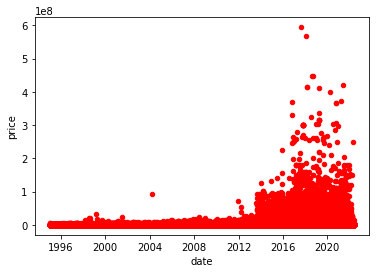

In [7]:
#Taking a look at the data again
ax1 = df_mod.plot(kind='scatter', x='date', y='price', color='r') 

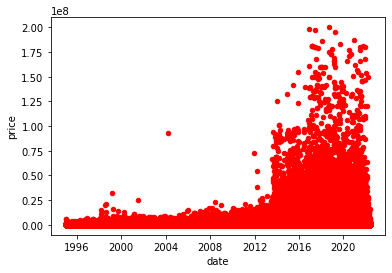

In [8]:
#Taking a closer look at the dense data i.e when price < 200 Mil
df_clean = df_mod.loc[df_mod['price'] <= 200000000 ]
ax1 = df_clean.plot(kind='scatter', x='date', y='price', color='r') 

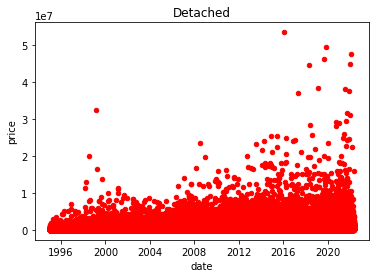

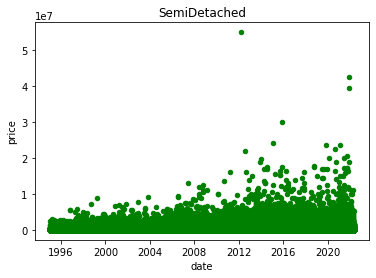

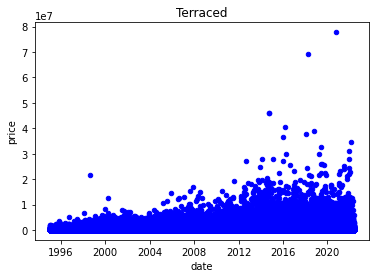

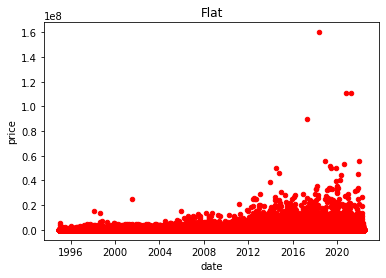

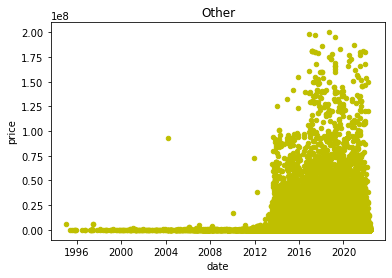

In [9]:
#We now try and find if each of the individual property types have any significant
#patterns in the way they affect prices

df_det = df_clean.loc[df_clean['type'] == 'D' ]
df_sd = df_clean.loc[df_clean['type'] == 'S' ]
df_ter = df_clean.loc[df_clean['type'] == 'T' ]
df_flat = df_clean.loc[df_clean['type'] == 'F' ]
df_ot = df_clean.loc[df_clean['type'] == 'O' ]
ax1 = df_det.plot(kind='scatter', x='date', y='price', color='r',title='Detached')    
ax2 = df_sd.plot(kind='scatter', x='date', y='price', color='g',title='SemiDetached')#, ax=ax1) 
ax3 = df_ter.plot(kind='scatter', x='date', y='price', color='b',title='Terraced')#, ax=ax1) 
ax4 = df_flat.plot(kind='scatter', x='date', y='price', color='r',title='Flat')
ax5 = df_ot.plot(kind='scatter', x='date', y='price', color='y',title='Other')

## Comments and Approach
From the above graphs we can see that the price of purchases have gone up significantly in the last 10 years or so. Most of this is due the rise of 'Other' types of property transactions as can be seen in the yellow graph above. This could be due to an introduction of some real-life event linked to the data such as a new Property Purchase Law for 'Other' property type, in which case, modelling purchase pattern for that type wasn't required before this event. Other types of property transactions remain roughly the same throughout with slight increase towards the end.
The given features also seem inadequate for the task of price prediction. Some new feature that could give us an idea of the AREA of the property would be immensly useful for this particular task.
The way I would approach this problem would be to either only consider the transactions after 2013 as input data(because of the significant rise of 'Other' tranasctions) and then model a Regressor on this reduced data or Model a separate regressor for the 4 kinds of properties and a different one for 'Other' types of property. Since the overall Data looks Linear, I would like to implement a simple Linear Regression model for now given the time constraint. A soft SVM could also be a very good model(maybe even with a kernel) that can be used to model this kind of data given the extreme outliers and high variance. I then use the R2 Score to measure the Test performance of the Linear Regressor since this gives normalized scores as compared to MSE which would give huge error terms since the Price Scale is too high. I also did not normalize the Y(price)since it would be difficult to properly capture this scale of order ~10^8 when normalized to the range of just 0-1

In [10]:
del df_det
del df_sd
del df_ter
del df_flat
del df_ot
del df_clean

In [11]:
#One-hot encoding 'Property type' feature

one_hot = pd.get_dummies(df_mod['type'])

In [12]:
df_mod = df_mod.join(one_hot)
df_mod.drop('type', axis=1, inplace=True)
df_mod

,price,date,duration,add7,D,F,O,S,T
0,36995,1995-03-24,0,1,0,1,0,0,0
1,25000,1995-03-31,0,1,0,1,0,0,0
2,25500,1995-05-17,0,1,0,1,0,0,0
3,42000,1995-04-21,0,1,0,0,0,0,1
4,43000,1995-06-30,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
27265980,575000,2022-03-23,1,0,0,0,0,1,0
27265981,1082000,2022-03-17,1,1,0,0,0,0,1
27265982,2165000,2022-02-02,1,0,0,0,1,0,0
27265983,360000,2022-01-20,1,0,0,0,1,0,0


In [13]:
#Splitting 
split_date ='2019-01-01 00:00:00'
train_data = df_mod.loc[df_mod['date'] <= split_date]
validation_data = df_mod.loc[df_mod['date'] > split_date]
train_data.drop('date', axis=1, inplace=True)
validation_data.drop('date', axis=1, inplace=True)
train_data

/data/local/sxa1507/env/venv/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,duration,add7,D,F,O,S,T
0,36995,0,1,0,1,0,0,0
1,25000,0,1,0,1,0,0,0
2,25500,0,1,0,1,0,0,0
3,42000,0,1,0,0,0,0,1
4,43000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
24881765,1600000,1,0,0,0,1,0,0
24886798,550525,0,1,0,1,0,0,0
24979947,138995,1,0,0,0,0,1,0
25056159,175000,0,0,0,0,1,0,0


In [14]:
validation_data

,price,duration,add7,D,F,O,S,T
24169783,271250,1,0,0,0,1,0,0
24169784,49985,1,0,0,0,1,0,0
24169785,500000,1,0,0,0,1,0,0
24169786,320000,1,0,0,0,0,1,0
24169787,76800,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
27265980,575000,1,0,0,0,0,1,0
27265981,1082000,1,1,0,0,0,0,1
27265982,2165000,1,0,0,0,1,0,0
27265983,360000,1,0,0,0,1,0,0


In [15]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# https://scikit-learn.org/0.15/modules/scaling_strategies.html could also be used when dealing with smaller df
#sizes at a time on resource constraint systems

Y_train = train_data['price']
X_train = train_data.drop('price', axis = 1)
Y_test = validation_data['price']
X_test = validation_data.drop('price', axis = 1)




In [19]:
from sklearn.linear_model import Ridge
linear_regressor = LinearRegression()#Ridge()  # create object for the class
linear_regressor.fit(X_train, Y_train)  # perform linear regression
linear_regressor.score(X_test,Y_test)  # Test Score

0.016596870358949967

R2 Score of the fitted model is 0.016. MSE could also be used but since the Regression range(prices) is really high, the error values would be too high

In [20]:
linear_regressor.score(X_train,Y_train)  # Training Score

0.03668666122747455